In [10]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot
import os
from copy import deepcopy
from time import time
from math import ceil
from scipy.stats import spearmanr, gamma, poisson
import scib.metrics as me
import scib
from anndata import AnnData, read_h5ad
import anndata as ad
import scanpy as sc
from scanpy import read
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from torch import tensor
from torch.cuda import is_available
from sciPENN_API import sciPENN_API
import scipy.io as sio
import scipy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
adata_gene = sc.read("final_rna.h5ad")
adata_protein = sc.read("final_adt.h5ad")

In [12]:
train_bool1 = [x in [0] for x in adata_gene.obs['batch']]
train_bool2 = [x in [1] for x in adata_gene.obs['batch']]
train_bool3 = [x in [2] for x in adata_gene.obs['batch']]
train_bool4 = [x in [3] for x in adata_gene.obs['batch']]
train_bool5 = [x in [4] for x in adata_gene.obs['batch']]
train_bool6 = [x in [5] for x in adata_gene.obs['batch']]
train_bool7 = [x in [6] for x in adata_gene.obs['batch']]
train_bool8 = [x in [7] for x in adata_gene.obs['batch']]

adata_gene_set1 = adata_gene[train_bool1].copy()
adata_protein_set1 = adata_protein[train_bool1].copy()
adata_gene_set2 = adata_gene[train_bool2].copy()
adata_protein_set2 = adata_protein[train_bool2].copy()
adata_gene_set3 = adata_gene[train_bool3].copy()
adata_protein_set3 = adata_protein[train_bool3].copy()
adata_gene_set4 = adata_gene[train_bool4].copy()
adata_protein_set4 = adata_protein[train_bool4].copy()
adata_gene_set5 = adata_gene[train_bool5].copy()
adata_protein_set5 = adata_protein[train_bool5].copy()
adata_gene_set6 = adata_gene[train_bool6].copy()
adata_protein_set6 = adata_protein[train_bool6].copy()
adata_gene_set7 = adata_gene[train_bool7].copy()
adata_protein_set7 = adata_protein[train_bool7].copy()
adata_gene_set8 = adata_gene[train_bool8].copy()
adata_protein_set8 = adata_protein[train_bool8].copy()

In [13]:
train_label1 = [x in ['B'] for x in adata_gene_set1.obs['l1']]
train_label2 = [x in ['CD4 T'] for x in adata_gene_set2.obs['l1']]
train_label3 = [x in ['CD8 T'] for x in adata_gene_set3.obs['l1']]
train_label4 = [x in ['DC'] for x in adata_gene_set4.obs['l1']]
train_label5 = [x in ['Mono'] for x in adata_gene_set5.obs['l1']]
train_label6 = [x in ['NK'] for x in adata_gene_set6.obs['l1']]
train_label7 = [x in ['other'] for x in adata_gene_set7.obs['l1']]
train_label8 = [x in ['other T'] for x in adata_gene_set8.obs['l1']]

adata_gene_set1 = adata_gene_set1[np.invert(train_label1)].copy()
adata_protein_set1 = adata_protein_set1[np.invert(train_label1)].copy()
adata_gene_set2 = adata_gene_set2[np.invert(train_label2)].copy()
adata_protein_set2 = adata_protein_set2[np.invert(train_label2)].copy()
adata_gene_set3 = adata_gene_set3[np.invert(train_label3)].copy()
adata_protein_set3 = adata_protein_set3[np.invert(train_label3)].copy()
adata_gene_set4 = adata_gene_set4[np.invert(train_label4)].copy()
adata_protein_set4 = adata_protein_set4[np.invert(train_label4)].copy()
adata_gene_set5 = adata_gene_set5[np.invert(train_label5)].copy()
adata_protein_set5 = adata_protein_set5[np.invert(train_label5)].copy()
adata_gene_set6 = adata_gene_set6[np.invert(train_label6)].copy()
adata_protein_set6 = adata_protein_set6[np.invert(train_label6)].copy()
adata_gene_set7 = adata_gene_set7[np.invert(train_label7)].copy()
adata_protein_set7 = adata_protein_set7[np.invert(train_label7)].copy()
adata_gene_set8 = adata_gene_set8[np.invert(train_label8)].copy()
adata_protein_set8 = adata_protein_set8[np.invert(train_label8)].copy()

In [14]:
sciPENN = sciPENN_API(gene_trainsets = [adata_gene_set1, adata_gene_set2, adata_gene_set3, adata_gene_set4, adata_gene_set5, adata_gene_set6, adata_gene_set7, adata_gene_set8], 
                        protein_trainsets = [adata_protein_set1, adata_protein_set2, adata_protein_set3, adata_protein_set4, adata_protein_set5, adata_protein_set6, adata_protein_set7, adata_protein_set8], 
                        train_batchkeys = ['donor', 'donor', 'donor', 'donor', 'donor', 'donor', 'donor', 'donor'])

Searching for GPU
GPU detected, using GPU

Normalizing Training Cells

Log-Normalizing Training Data

Normalizing Gene Training Data by Batch


100%|██████████| 8/8 [00:02<00:00,  3.43it/s]



Normalizing Protein Training Data by Batch


100%|██████████| 1/1 [00:00<00:00, 29.94it/s]


In [15]:
sciPENN.train(quantiles = [0.1, 0.25, 0.75, 0.9], n_epochs = 2000, ES_max = 12, decay_max = 6, decay_step = 0.1, 
              lr = 10**(-3), weights_dir = "offline_INTEGRATE_label", load = True)

Epoch 0 prediction loss = 1.429
Epoch 1 prediction loss = 0.994
Epoch 2 prediction loss = 0.961
Epoch 3 prediction loss = 0.946
Epoch 4 prediction loss = 0.938
Epoch 5 prediction loss = 0.931
Epoch 6 prediction loss = 0.926
Epoch 7 prediction loss = 0.921
Epoch 8 prediction loss = 0.918
Epoch 9 prediction loss = 0.916
Epoch 10 prediction loss = 0.913
Epoch 11 prediction loss = 0.912
Epoch 12 prediction loss = 0.910
Epoch 13 prediction loss = 0.909
Epoch 14 prediction loss = 0.908
Epoch 15 prediction loss = 0.906
Epoch 16 prediction loss = 0.905
Epoch 17 prediction loss = 0.904
Epoch 18 prediction loss = 0.905
Epoch 19 prediction loss = 0.904
Epoch 20 prediction loss = 0.903
Epoch 21 prediction loss = 0.903
Decaying loss to 0.0001
Epoch 22 prediction loss = 0.901
Epoch 23 prediction loss = 0.901
Epoch 24 prediction loss = 0.901
Epoch 25 prediction loss = 0.901
Epoch 26 prediction loss = 0.901
Epoch 27 prediction loss = 0.901
Epoch 28 prediction loss = 0.901
Epoch 29 prediction loss = 0.

In [16]:
embedding = sciPENN.embed()
embedding.write("offline_label.h5ad")

... storing 'l1' as categorical
... storing 'batch' as categorical
... storing 'donor' as categorical
... storing 'Dataset' as categorical


In [17]:
df = pd.DataFrame(embedding.X)
df.to_csv("scipenn_offline.csv", sep=',', index=False, header=False)

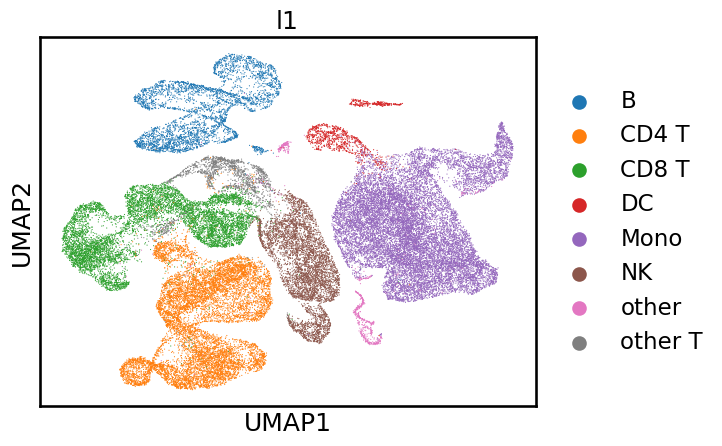

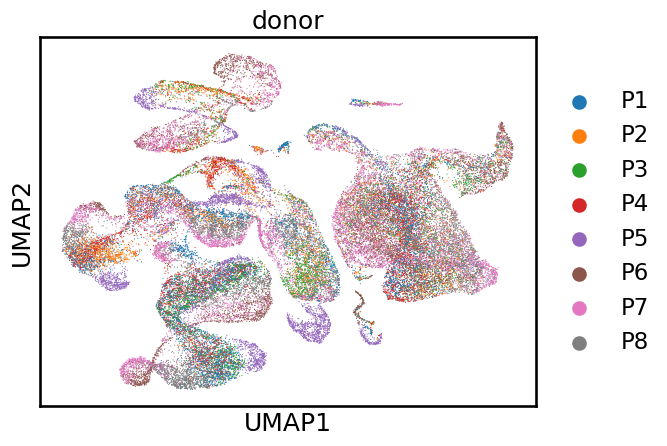

In [18]:
scipenn_embedding = sc.read('offline_label.h5ad')
view = scipenn_embedding[np.random.choice(scipenn_embedding.n_obs, scipenn_embedding.n_obs, replace=False)]
new = sc.pp.subsample(scipenn_embedding, fraction=1, copy=True)
sc.pp.neighbors(new, n_pcs = 20)
sc.tl.umap(new)
sc.pl.umap(new, color='l1', save='scipenn_rna+adt_offline_label_integration_celltype.png')
sc.pl.umap(new, color='donor', save='scipenn_rna+adt_offline_label_integration_donor.png')